In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Datasets/EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
np.any(np.isnan(data))

False

In [4]:
np.all(np.isfinite(data))

True

In [5]:
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [6]:
data.loc[(data['Bonus_miles']<=5000),'Group']=1
data.loc[(data['Bonus_miles']>5000) & (data['Bonus_miles']<=10000),'Group']=2
data.loc[(data['Bonus_miles']>10000) & (data['Bonus_miles']<=25000),'Group']=3
data.loc[(data['Bonus_miles']>25000) & (data['Bonus_miles']<=50000),'Group']=4
data.loc[(data['Bonus_miles']>50000),'Group']=5
data['Group'].astype('int')

0       1
1       1
2       1
3       1
4       4
       ..
3994    2
3995    1
3996    4
3997    1
3998    1
Name: Group, Length: 3999, dtype: int32

In [7]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4.0


In [8]:
data[np.any(np.isnan(data),axis=1)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group


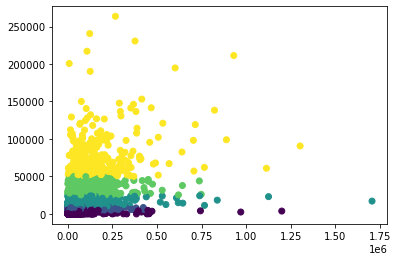

In [12]:
plt.scatter(data['Balance'],data['Bonus_miles'],c=data['Group'])

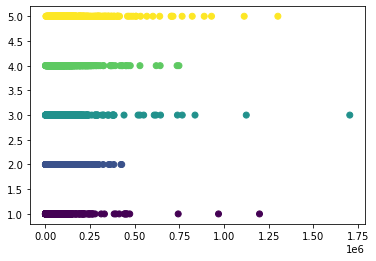

In [11]:
plt.scatter(data['Balance'],data['Group'], c=data['Group'])

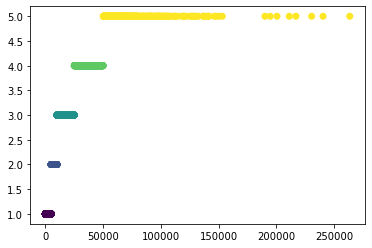

In [13]:
plt.scatter(data['Bonus_miles'],data['Group'], c=data['Group'])

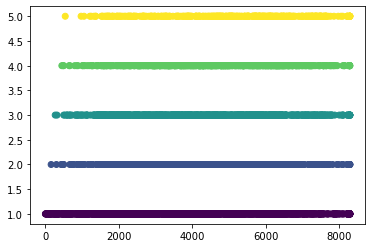

In [14]:
plt.scatter(data['Days_since_enroll'],data['Group'], c=data['Group'])

In [9]:
data_h=data # This for hierarchical Clustering 
data_k=data # This for K-Means Clustering

In [10]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(data_k)

KMeans(n_clusters=5)

In [11]:
kmeans.cluster_centers_

array([[2.21831743e+03, 2.61408669e+04, 9.99422846e+01, 1.55551102e+00,
        1.01683367e+00, 1.00440882e+00, 8.64785812e+03, 8.72184369e+00,
        2.58428056e+02, 7.99599198e-01, 3.73309098e+03, 3.15831663e-01,
        1.77955912e+00],
       [1.52740816e+03, 2.07681577e+05, 3.07116618e+02, 3.02915452e+00,
        1.00583090e+00, 1.01457726e+00, 3.57098776e+04, 1.83148688e+01,
        1.04054810e+03, 2.93294461e+00, 5.02718659e+03, 4.92711370e-01,
        3.48688047e+00],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01,
        3.73684211e+00],
       [1.79455461e+03, 9.78936857e+04, 1.62668566e+02, 2.81766382e+00,
        1.01044634e+00, 1.02849003e+00, 2.77577968e+04, 1.53760684e+01,
        6.29433048e+02, 1.82905983e+00, 4.53682051e+03, 4.20702754e-01,
        3.13105413e+00],
       [1.05087640e+03, 4.18790180e+

In [12]:
pred=kmeans.predict(data_k)
pred

array([0, 0, 0, ..., 3, 0, 0])

In [13]:
data_k['Cluster']=pd.DataFrame(pred)

In [14]:
data_k.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4.0,3


In [15]:
data_k[data_k['Cluster']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group,Cluster
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3.0,1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0,1.0,1
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,3.0,1
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,4.0,1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,3845,166638,0,5,1,1,64572,22,0,0,1697,0,5.0,1
3839,3862,204693,0,1,1,1,5159,5,0,0,1672,0,2.0,1
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,5.0,1
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,3.0,1


In [16]:
data_k[data_k['Cluster']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group,Cluster
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,1.0,2
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,5.0,2
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,5.0,2
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,5.0,2
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,3.0,2
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,5.0,2
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,3.0,2
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,5.0,2
471,477,743745,2066,1,1,1,4100,20,2500,18,8228,1,1.0,2
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,3.0,2


In [17]:
data_k[data_k['Cluster']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group,Cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4.0,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,4.0,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4.0,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,5.0,3
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,1.0,3
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,4.0,3
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,3.0,3
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,4.0,3


In [18]:
data_k[data_k['Cluster']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group,Cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1.0,4
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,3.0,4
63,64,362642,0,1,1,1,28079,8,0,0,6835,0,4.0,4
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,3.0,4
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2676,644881,2600,1,1,1,14350,28,10850,26,2511,1,3.0,4
2709,2731,405499,1000,4,1,1,72318,46,9729,29,2329,1,5.0,4
2984,3006,326201,0,1,1,1,19350,14,0,0,3119,0,3.0,4
3040,3062,449205,1121,1,1,1,4750,9,3250,8,3071,1,1.0,4


In [19]:
data_k[data_k['Cluster']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Group,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1.0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2.0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1.0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1.0,0


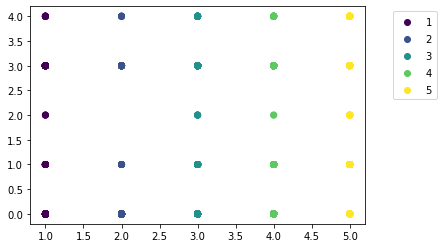

In [20]:
plt.subplot()

scatter=plt.scatter(data_k['Group'],data_k['Cluster'],c=data_k['Group'])
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1.07, 1))
plt.show()

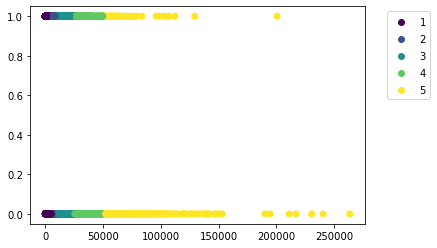

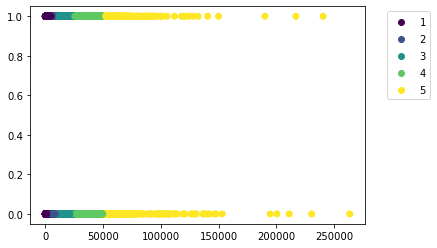

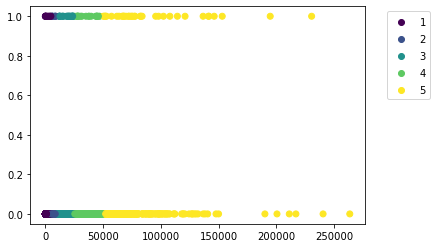

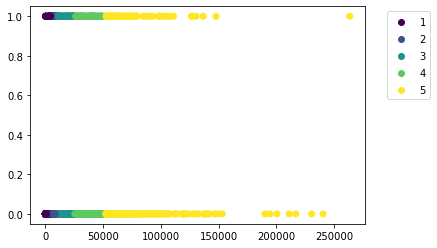

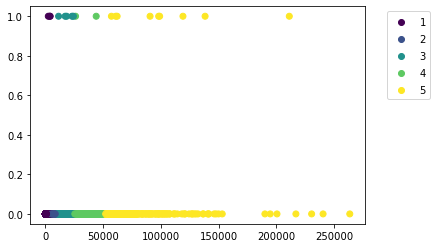

In [21]:
for x in data_k['Cluster'].unique():
    scatter=plt.scatter(data_k['Bonus_miles'],data_k['Cluster']==x,c=data_k['Group']).legend_elements()
    plt.legend(*scatter,bbox_to_anchor=(1.21, 1))
    plt.show()

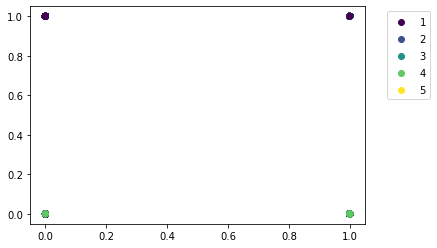

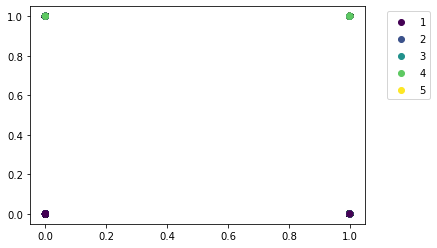

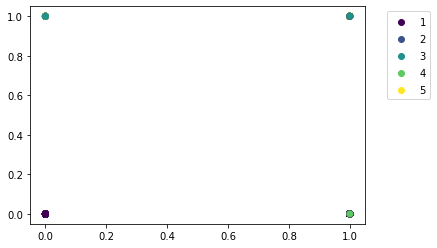

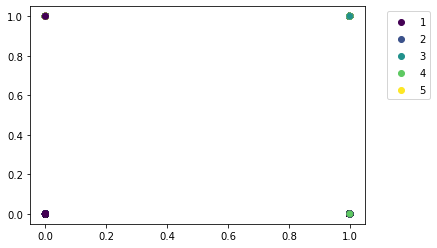

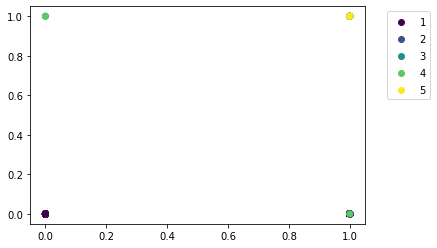

In [22]:
for x in data_k['Cluster'].unique():
    scatter=plt.scatter(data_k['Award?'],data_k['Cluster']==x,c=data_k['Group']).legend_elements()
    plt.legend(*scatter,bbox_to_anchor=(1.21, 1))
    plt.show()

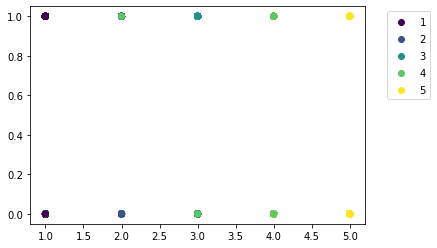

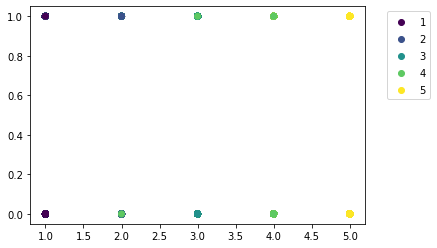

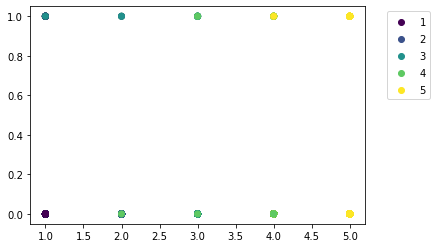

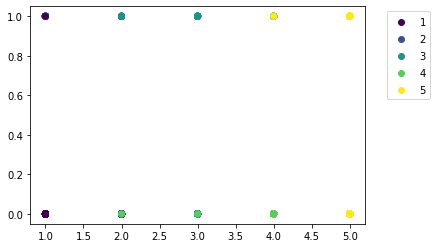

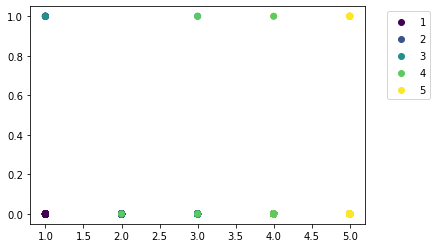

In [23]:
for x in data_k['Cluster'].unique():
    scatter=plt.scatter(data_k['cc1_miles'],data_k['Cluster']==x,c=data_k['Group']).legend_elements()
    plt.legend(*scatter,bbox_to_anchor=(1.21, 1))
    plt.show()

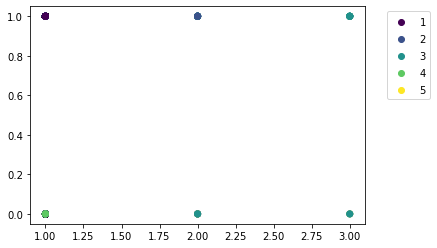

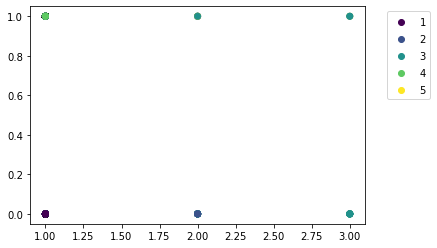

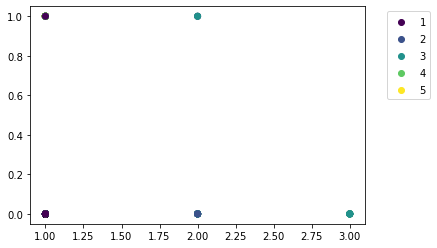

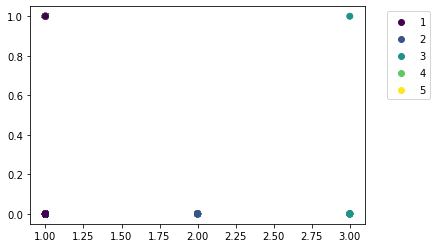

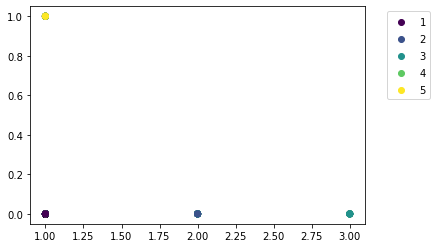

In [24]:
for x in data_k['Cluster'].unique():
    scatter=plt.scatter(data_k['cc2_miles'],data_k['Cluster']==x,c=data_k['Group']).legend_elements()
    plt.legend(*scatter,bbox_to_anchor=(1.21, 1))
    plt.show()

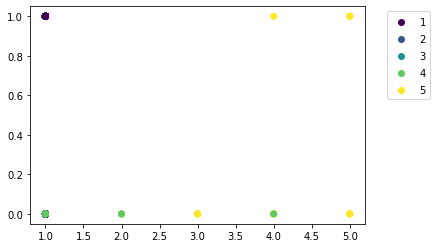

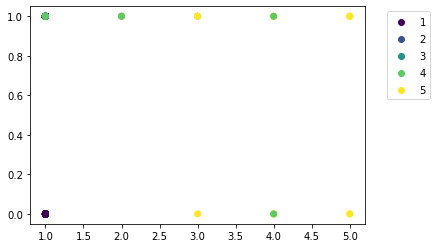

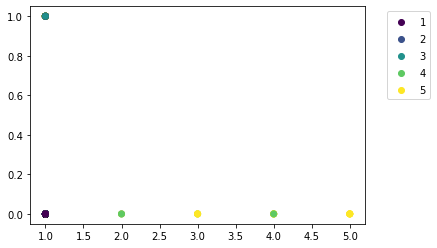

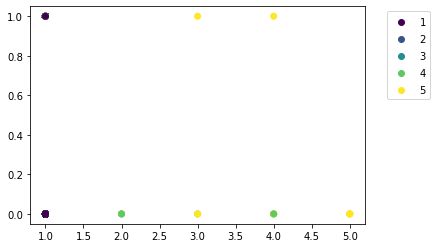

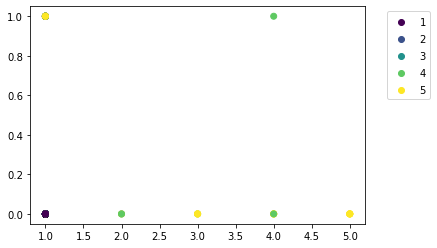

In [25]:
for x in data_k['Cluster'].unique():
    scatter=plt.scatter(data_k['cc3_miles'],data_k['Cluster']==x,c=data_k['Group']).legend_elements()
    plt.legend(*scatter,bbox_to_anchor=(1.21, 1))
    plt.show()

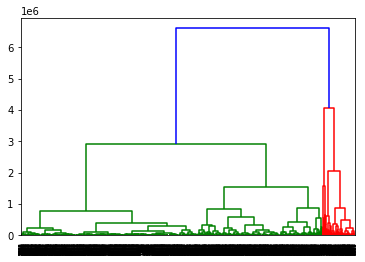

In [26]:
hclust=sch.dendrogram(sch.linkage(data_h,method='ward'))